## Topic Modeling

### Importing the necessary libraries

In [ ]:
pip install clean-text

In [1]:
import os, types
import numpy as np
import re
import csv
import json
import pandas as pd
from collections import Counter

In [2]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from cleantext import clean
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [3]:
def jsonToDF(name):
    """Read a list of sentences from the JSON file, store them in a dataframe"""
    
    with open(f"{name}.json") as fin:
        textList = json.load(fin)

    # create a name for each document, based on its category
    indexNames = [f"{name}" for i in range(len(textList))]

    # create the dataframe, it will have one column and one index
    df = pd.DataFrame(data=textList, index=indexNames)
    df.columns = ['document']
    return df

In [4]:
user1 = jsonToDF("user1")
user2 = jsonToDF("user2")
user3 = jsonToDF("user3")
user4 = jsonToDF("user4")
user5 = jsonToDF("user5")
user6 = jsonToDF("user6")
user7 = jsonToDF("user7")
user8 = jsonToDF("user8")
user9 = jsonToDF("user9")
user10 = jsonToDF("user10")

In [5]:
#remove duplicates and missing values
def cleanDf(df):
    df.dropna(subset=['document'])
    df.drop_duplicates(inplace=True)
    return df

In [46]:
allDocs = [user1, user2, user3, user4, user5, user6, user7, user8, user9, user10]
for df in allDocs:
    df = cleanDf(df)

TypeError: unhashable type: 'list'

In [180]:
#removes emojis from text
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

def strip_emoji(text):
    if not isinstance(text, str):
        return str(text)
    return RE_EMOJI.sub(r'', text)

user10['document'] = user10['document'].apply(strip_emoji)

In [181]:
#splits hashtags
def splitHashtags(sentence):
    """Takes a sentence and splits hashtags if present"""
    if isinstance(sentence, str):
        hashtags = [tag.strip('#') for tag in sentence.split('#') if tag.strip('#')]
        return ''.join(hashtags)
    return []

user10['document'] = user10['document'].apply(splitHashtags)

In [182]:
toRemove = ['fyp', 'trending', 'foryou', 'viral', 'foryoupage', 'fy', 'fypage', 'blowthisup', 'tiktok', 'video', 'videos', 'forypu', 'fup', 'everyonefyp', 'reaction', 'fypviral', 'relatable']

def remove_words(sentence):
    """Takes a sentence and removes popular phrases"""
    if not isinstance(sentence, str):
        return str(sentence)
    words = sentence.split()
    return ' '.join(word for word in words if word.lower() not in toRemove)

user10['document'] = user10['document'].apply(remove_words)
pd.set_option("display.max_colwidth",1000)
user10

,document
user10,Replying to @jadenot perfect yet & i made a couple of changes later but this is the final result from the session choreographwithme choreography @Rayne.drop
user10,s/o to dream academy for teaching me how to dance like this tho a sweaty lil coverrrr dc: @hamlytavarez dance dancechoreography cover dreamacademyhq adelajergova
user10,"$25 flights for people with Amazon Student Prime for the holidays!!! this is the most insane flight deal I have ever seen, go book ASAP!! ✨only 1,000 flights per day available ✨only for flights within the US ✨must book December 5 - December 7 ✨departure date must be between December 8 and December 25 ✨return date must be between December 8 and January 14 ✨ choose a flight itinerary with only 1 (one) traveler ✨not seeing flights for $25? Itineraries over $500 are discounted at a cost of $25 plus the amount over $500 Remember there are a limited number of discounts each day, so book ASAP!!! travel traveltiktok studenttravel traveldeal traveldiscount amazonprimestudents amazonprimestudent studentuniverse cheapflight flightdeal flightdeals cheapflights2023 traveldeals travelfinds traveldiscount caritravels flightdiscounts traveltok studenttravels studenttraveltips studentprime holidaytravel holidaytraveldeals insanedeals"
user10,Replying to @Emily today we’re making some DIY ornaments for my toddler’s infamous Step 2 my first christmas tree!! Tried to make them a little more toddler proof & they might just have a little color too DIY step2christmas myfirstchristmastree diyproject diyornaments toddlerchristmastree step2toys toddlermom diymom toddlerchristmas MomsofTikTok
user10,Let’s give my toddler’s Step 2 my first christmas tree a DIY makeover What do you think?? DIY step2christmas myfirstchristmastree diyproject toddlerchristmastree step2toys toddlermom diymom toddlerchristmas momsoftiktok
...,...
user10,"Brenda Song, macaulay culkin, rory culkin, Kieran Culkin, macaulay culkin and brenda song, macaulay culkin hollywood star, macaulay culkin brother, macaulay culkin voice, Brenda Song And Macaulay, what happened to macaulay culkin"
user10,"Disney 100, cactus, cactus dancing toy, cactus toys, bebes asustandose, cactus baby toys, cactus plant, videos, Baby Gifts, Funny"
user10,"woongki, woongki and seunghwan, Hyeongjun Cravity, woong ki and hyeongjun, cravity band, Boys Planet, Hyeongjun Edits, Kim Ji Woong - Boys Planet, cravityofficial, kpop edits"
user10,"Look Around Everybody On Mute, were you silent or silenced, but are you her girl, look around everybody on mute teacher, Were You Silent Or Were You Silenced, Everybody On Mute Beyonce, but are you her man, Everybody On Mute Beyonce Yall Won, Her Man My Man Two Words, Everybody On Mute"


### Convert to document-term matrix

In [183]:
from sklearn.feature_extraction.text import CountVectorizer

In [184]:
# Initialize the vectorizer
vectorizer = CountVectorizer(
    strip_accents='unicode',
    stop_words='english',
    lowercase=True,
    token_pattern=r'\b[a-zA-Z]{3,}\b', # we want only words that contain letters and are 3 or more characters long
)

# Transform our data into the document-term matrix
dtm = vectorizer.fit_transform(user10['document'])
dtm

<455x3053 sparse matrix of type '<class 'numpy.int64'>'
	with 4773 stored elements in Compressed Sparse Row format>

In [185]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['aaron', 'aboriginal', 'absolu', ..., 'zombie', 'zombies', 'zone'],
      dtype=object)

In [186]:
def matrix2Doc(dtMatrix, features, index):
    """Turns each row of the document-term matrix into a list of terms"""
    row = dtMatrix.getrow(index).toarray()
    non_zero_indices = row.nonzero()[1]
    words = [features[idx] for idx in non_zero_indices]
    return words

In [187]:
user10AsTerms = [matrix2Doc(dtm, feature_names, i) for i in range(dtm.shape[0])]

In [188]:
user10['terms'] = user10AsTerms
pd.set_option("display.max_colwidth",1000)
user10.head()

,document,terms
user10,Replying to @jadenot perfect yet & i made a couple of changes later but this is the final result from the session choreographwithme choreography @Rayne.drop,"[changes, choreographwithme, choreography, couple, drop, final, jadenot, later, perfect, rayne, replying, result, session]"
user10,s/o to dream academy for teaching me how to dance like this tho a sweaty lil coverrrr dc: @hamlytavarez dance dancechoreography cover dreamacademyhq adelajergova,"[academy, adelajergova, cover, coverrrr, dance, dancechoreography, dream, dreamacademyhq, hamlytavarez, like, lil, sweaty, teaching, tho]"
user10,"$25 flights for people with Amazon Student Prime for the holidays!!! this is the most insane flight deal I have ever seen, go book ASAP!! ✨only 1,000 flights per day available ✨only for flights within the US ✨must book December 5 - December 7 ✨departure date must be between December 8 and December 25 ✨return date must be between December 8 and January 14 ✨ choose a flight itinerary with only 1 (one) traveler ✨not seeing flights for $25? Itineraries over $500 are discounted at a cost of $25 plus the amount over $500 Remember there are a limited number of discounts each day, so book ASAP!!! travel traveltiktok studenttravel traveldeal traveldiscount amazonprimestudents amazonprimestudent studentuniverse cheapflight flightdeal flightdeals cheapflights2023 traveldeals travelfinds traveldiscount caritravels flightdiscounts traveltok studenttravels studenttraveltips studentprime holidaytravel holidaytraveldeals insanedeals","[amazon, amazonprimestudent, amazonprimestudents, asap, available, book, caritravels, cheapflight, choose, cost, date, day, deal, december, departure, discounted, discounts, flight, flightdeal, flightdeals, flightdiscounts, flights, holidays, holidaytravel, holidaytraveldeals, insane, insanedeals, itineraries, itinerary, january, limited, number, people, plus, prime, remember, return, seeing, seen, student, studentprime, studenttravel, studenttravels, studenttraveltips, studentuniverse, travel, traveldeal, traveldeals, traveldiscount, traveler, travelfinds, traveltiktok, traveltok]"
user10,Replying to @Emily today we’re making some DIY ornaments for my toddler’s infamous Step 2 my first christmas tree!! Tried to make them a little more toddler proof & they might just have a little color too DIY step2christmas myfirstchristmastree diyproject diyornaments toddlerchristmastree step2toys toddlermom diymom toddlerchristmas MomsofTikTok,"[christmas, color, diy, diymom, diyornaments, diyproject, emily, infamous, just, little, make, making, momsoftiktok, myfirstchristmastree, ornaments, proof, replying, step, today, toddler, toddlerchristmas, toddlerchristmastree, toddlermom, tree, tried]"
user10,Let’s give my toddler’s Step 2 my first christmas tree a DIY makeover What do you think?? DIY step2christmas myfirstchristmastree diyproject toddlerchristmastree step2toys toddlermom diymom toddlerchristmas momsoftiktok,"[christmas, diy, diymom, diyproject, let, makeover, momsoftiktok, myfirstchristmastree, step, think, toddler, toddlerchristmas, toddlerchristmastree, toddlermom, tree]"


### Fitting the LDA model

In [189]:
from sklearn.decomposition import LatentDirichletAllocation

In [190]:
# Step 1: Initialize the model
lda = LatentDirichletAllocation(n_components=5, # we are picking the number of topics arbitrarily at the moment
                                random_state=0)
# Step 2: Fit the model
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=0)

In [191]:
lda.components_.shape

(5, 3053)

In [192]:
doc_topic_dist = lda.transform(dtm)
doc_topic_dist 

array([[0.01431707, 0.94259146, 0.01442276, 0.01431553, 0.01435317],
       [0.94915085, 0.01258221, 0.01253432, 0.01302057, 0.01271205],
       [0.98818685, 0.00295155, 0.00294998, 0.00295143, 0.0029602 ],
       ...,
       [0.00954402, 0.00952794, 0.0096763 , 0.9613584 , 0.00989334],
       [0.00743239, 0.00742656, 0.00742957, 0.97017442, 0.00753707],
       [0.01000126, 0.01000124, 0.01000132, 0.95992959, 0.01006658]])

In [193]:
doc_topic_dist.shape

(455, 5)

In [194]:
def display_topics(model, features, no_top_words):
    """Helper function to show the top words of a model"""
    for topic_idx, topic in enumerate(model.components_):                                                                                                             
        print(f"Topic {topic_idx}:")
        print(" ".join([features[i]
                        for i in topic.argsort()[:-no_top_words-1:-1]]))

display_topics(lda, feature_names, 30)

Topic 0:
asmr target sleep chipotle kanan makeup videos life starbucks kiss hermione jojo nyc relaxing lip shinee dance mma like aina jackie raising scantron wooden subway december work skincare american people
Topic 1:
advent calendar dog adventcalendar unboxing morgan laufey wallen nessa henny college accent replying dogs nfl dance iud training grwm ysl makeup rock make day camp border collie british love puppy
Topic 2:
kpop food lancome yechan halle chloe keeho couch stitch funny jeremy major hawaii replying japan disney palmer keke flowers cafe rottie cactus posse luxury asmrvideo felix kids want tiktok edit
Topic 3:
sydney sweeney maybelline thanksgiving little woman christmas food game play let language sat song hello skibidi wonyoung trap kindle tea kpop sunwoo angels tibet celeb video concert coffee smith service
Topic 4:
cream band buldak funny cheese christmas nutcracker ticket dogs beyonce dog toilet trader shifter pumpkin hermes universe culkin marching ramen noodles jumpsu

In [195]:
def displayHeader(model, features, no_top_words):
    """Helper function to show the top words of a model"""
    topicNames = []
    for topic_idx, topic in enumerate(model.components_):
        topicNames.append(f"Topic {topic_idx}: " + (", ".join([features[i]
                             for i in topic.argsort()[:-no_top_words-1:-1]])))
    return topicNames

In [196]:
# column names
topicnames = displayHeader(lda, feature_names, 0)

# index names
docnames = user10.index.tolist() # We will use the original names of the documents

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(doc_topic_dist, 3), 
                                 columns=topicnames, 
                                 index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1) # finds the maximum argument
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.tail()

,Topic 0:,Topic 1:,Topic 2:,Topic 3:,Topic 4:,dominant_topic
user10,0.007,0.007,0.007,0.007,0.972,4
user10,0.011,0.011,0.958,0.011,0.011,2
user10,0.010,0.010,0.010,0.961,0.010,3
user10,0.007,0.007,0.007,0.970,0.008,3
user10,0.010,0.010,0.010,0.960,0.010,3


In [197]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Sentences']
df_topic_distribution

,Topic Num,Num Sentences
0,3,107
1,1,91
2,0,88
3,2,86
4,4,83


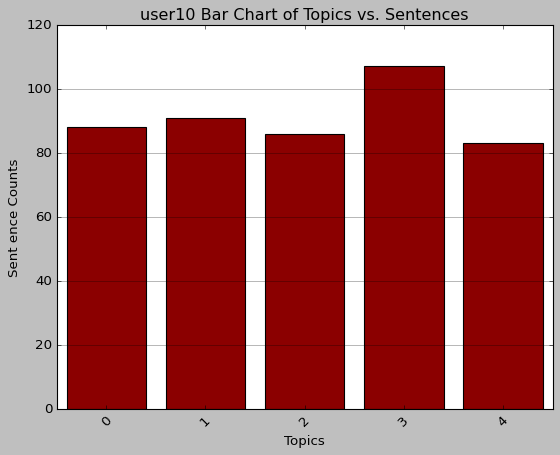

In [198]:
# Extract data from DataFrame columns
x_values = df_topic_distribution['Topic Num']
y_values = df_topic_distribution['Num Sentences']

# Plot the bar chart
plt.style.use('classic')
plt.bar(x_values, y_values, color='darkred')
plt.grid(axis='y', linestyle='solid', linewidth=0.5, alpha=0.5)
plt.xlim(-0.5, 4.5)

# Add labels and title
plt.xlabel('Topics')
plt.ylabel('Sent ence Counts')
plt.title('user10 Bar Chart of Topics vs. Sentences')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.show()